<a href="https://colab.research.google.com/github/yoonju977/CV_hufs_25-1/blob/main/CV_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [4]:
imgL_path = '/content/drive/MyDrive/HUFS/컴퓨터비전/im2.png'
imgR_path = '/content/drive/MyDrive/HUFS/컴퓨터비전/im6.png'

#Grayscale 변환
imgL_color = cv.imread(imgL_path)
imgR_color = cv.imread(imgR_path)
imgL = cv.cvtColor(imgL_color, cv.COLOR_BGR2GRAY)
imgR = cv.cvtColor(imgR_color, cv.COLOR_BGR2GRAY)

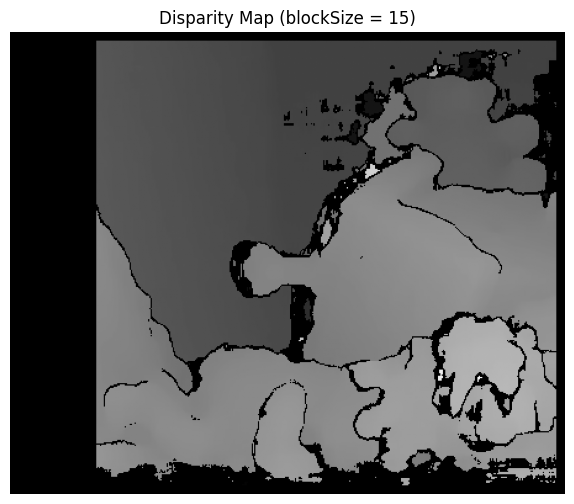

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# StereoBM 객체 생성: numDisparities=64, blockSize=15 (기본값)
stereo = cv.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(imgL, imgR)

# 시각화(블럭사이즈 변경전)
plt.figure(figsize=(8, 6))
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map (blockSize = 15)')
plt.axis('off')
plt.show()

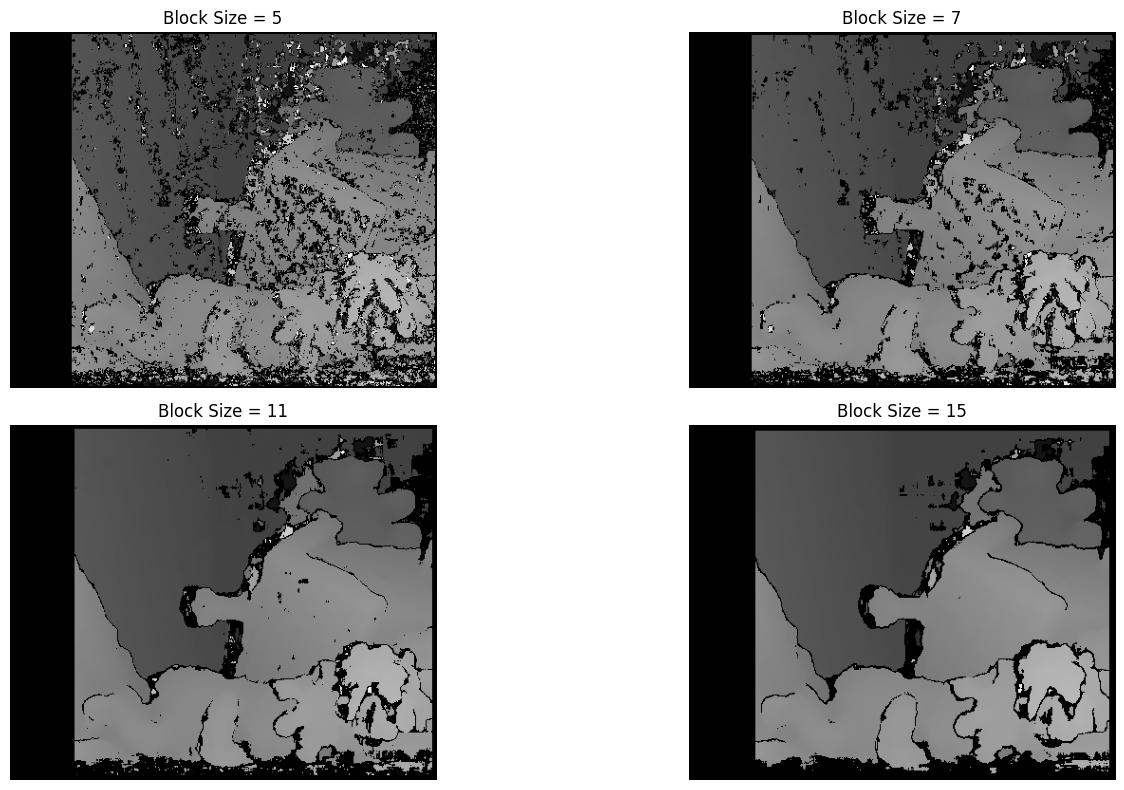

In [6]:
def compute_disparity(block_size):
    stereo = cv.StereoBM_create(numDisparities=64, blockSize=block_size)
    disparity = stereo.compute(imgL, imgR)
    return disparity

block_sizes = [5, 7, 11, 15]   #블럭사이즈변경후
plt.figure(figsize=(16, 8))
for i, block_size in enumerate(block_sizes):
    disparity = compute_disparity(block_size)
    plt.subplot(2, 2, i + 1)
    plt.imshow(disparity, 'gray')
    plt.title(f'Block Size = {block_size}')
    plt.axis('off')
plt.tight_layout()
plt.show()

- blockSize가 작을수록 디테일은 더 잘 보이지만 잡음이 많아짐.
- blockSize가 클수록 노이즈는 줄어들지만 작은 구조물이나 윤곽이 흐려지는 경향이 있음.

#2. LiDAR에 관한 동영상을 시청하고 다른 자료들도 검색하여 기능을 탐색하고 다음 물음을 설명하라.

a. LiDAR에서 3D 정보를 수집하는 원리:

- LiDAR는 **레이저 펄스를 물체에 쏜 후 반사되어 돌아오는 시간(Time-of-Flight)**을 측정하여 거리(d)를 계산.
- ***거리 = 속도(빛) × 시간 / 2***
- 정확도: 일반적으로 ±2 cm 이하, 고급 장비는 mm 단위까지도 가능.

b. LiDAR 장치가 회전하는 이유 및 영상 처리 수:

- 회전은 360도 스캔을 가능하게 하여 전방위 환경 정보를 수집.
- 일반적인 장치는 초당 5~20Hz, 고성능 모델은 초당 수백만 포인트(Point Cloud)를 처리할 수 있음.

#3. 수업자료 12장 35쪽에 나와 있는 Laser 센서는 Lidar와 다른 방식으로 작동한다.

## a. 구조광 방식에서는 거리를 어떻게 측정하는가?

- 구조광(Structured Light)은 **패턴화된 빛(레이저나 적외선 무늬 등)**을 물체에 투사하고, 그 **투사된 패턴이 물체의 표면에 따라 어떻게 왜곡되는지를 카메라로 관찰**

- 구조광 방식의 핵심은 삼각측량(triangulation) 원리이다.
  즉, **프로젝터와 카메라 간의 기준 거리(기하 구조)**와 **패턴의 왜곡 정도**를 이용하여 각 점의 **깊이(거리)를 계산**

- 이는 [12장 35p]에서 설명된 "3D Laser Scanner"의 평면파 투사와 유사하며,  
  **프로젝터의 패턴과 카메라의 영상 사이 대응점을 정밀하게 맞추는 것이 핵심**이다.

---

## b. 구조광 방식 vs LiDAR: 장단점 비교

| 항목 | 구조광 방식 (Structured Light) | LiDAR (Time-of-Flight) |
|------|-------------------------------|-------------------------|
| **측정 원리** | 패턴을 투사하고 그 변형을 카메라로 분석하여 깊이 계산 | 빛(레이저)의 발사와 반사 시간을 측정하여 거리 계산 |
| **장점** | - 고해상도, 정밀한 실내 측정 가능<br>- 정교한 3D 모델링에 적합 | - 넓은 거리 커버리지<br>- 다양한 조명 환경에서도 작동<br>- 실외/야간 사용 가능 |
| **단점** | - 외부 조명이나 반사에 민감함<br>- 주로 실내 사용에 적합 | - 기기 가격이 높음<br>- 반사율 낮은 물체에는 취약 |
| **대표 장치** | Microsoft Kinect (초기형) | Velodyne, Ouster, Quanergy 등 |
| **3D 포인트 밀도** | 높음 (Dense) | 상대적으로 낮음 (Sparse, Point Cloud) |
| **시야 확보 방식** | 고정형 or 스캔 방식 (넓은 시야각 확보 어려움) | 장치 자체 회전 or 멀티빔 방식으로 360도 확보 가능 |

---

## Reference: 수업 자료

- 구조광 방식은 **스테레오의 카메라 한 대를 프로젝터로 바꾼 것**으로 이해할 수 있으며,  
  [12장 36p]에서는 이러한 방식이 epipolar 대응점을 찾기 쉽게 만들어 준다고 설명한것을 참고로 과제 답변.

- 반면 LiDAR는 [12장 34p]에서  
  **"빛을 쏘고 되돌아오는 시간(time-of-flight 또는 위상차)을 측정하여 거리로 변환"**한다는 정의를 가제 답변으로 사용.